In [2]:
import pandas as pd 
import seaborn as sns

df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
# Thống kể dữ liệu (Mô tả dữ liệu)

# In ra giá trị nhỏ nhất và lớn nhất của cột 'M1'
print(f'df m1 min: {df["M1"].min()}\ndf m1 max: {df["M1"].max()}\n')

# In ra giá trị trung bình và giá trị trung vị của cột 'M1'
print(f'df m1 mean: {df["M1"].mean()}\ndf m1 median: {df["M1"].median()}\n')

# In ra giá trị mode (giá trị xuất hiện nhiều nhất) của cột 'KT'
print(f'df kt mode: {df["KT"].mode()}\n')

# In ra giá trị phân vị thứ 25 của cột 'M1'
print(f'df quantile 0.25: {df["M1"].quantile(0.25)}\n')

df m1 min: 1.0
df m1 max: 7.0

df m1 mean: 3.74
df m1 median: 3.625

df kt mode: 0    A
Name: KT, dtype: object

df quantile 0.25: 2.5



In [4]:
# Hãy tính phân vị thứ 9 trong thập phân vị cho M1 và M2
# Gợi ý: phân vị thứ 9 có tỉ lệ là 0.9
print(f'df M1 quantile 0.9: {df["M1"].quantile(0.9)}\n')
print(f'df M2 quantile 0.9: {df["M2"].quantile(0.9)}\n')



df M1 quantile 0.9: 5.300000000000004

df M2 quantile 0.9: 5.5



In [5]:
# các đại lượng đo lượng độ phân tán

#range
range = df['M1'].max() - df['M1'].min()
range

6.0

In [6]:
# IQR

df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

2.25

In [9]:
# tính range và iqr của m2
range2 = df['M2'].max() - df['M2'].min()
iqr2 = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

print(f'range m2: {range2}')
print(f'iqr m2: {iqr2}')

range m2: 6.5
iqr m2: 1.25


In [10]:
# độ lệch trung bình deltaD
import numpy as np

deltaD = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
deltaD

1.1600000000000001

In [11]:
# range cho m1 và m2
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [13]:
# iqr cho m1 và m2
df[['M1', 'M2']].quantile(0.75) - df[['M1', 'M2']].quantile(0.25)

M1    2.25
M2    1.25
dtype: float64

In [14]:
# phương sai
df['M1'].var()

2.0289393939393943

In [15]:
# độ lệch chuẩn 
df['M1'].std()

1.424408436488423

In [16]:
# pp sử dụng std để só sánh mức độ biến động của hai hay nhiều biến sô
# vd: ss mức độ ổn định của m1 và m2
print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())
# lưu ý: cần đảm bảo m1 và m2 cùng hệ quy chiếu (đơn vị so sánh)

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [17]:
# pp dùng cv để so sánh mức độ biến động của hai hay nhiều biến sso
df[['M1','M2']].std()/df[['M1','M2']].mean()

M1    0.380858
M2    0.249131
dtype: float64

In [18]:
# sư dụng cv để so sánh mức độ phân tán của m1 m2 m3
# chuyển về danh sách
cv = df[["M1", "M2", "M3"]].std() / df[["M1", "M2", "M3"]].mean()
list(cv)

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [31]:
# viet code de tim ra gia tri cv lon nhat va nho nhat 
# sap xep tang dan danh sach cac gia tri cv
cv = df[["M1", "M2", "M3"]].std() / df[["M1", "M2", "M3"]].mean()
print(f'cv max: {cv.max()}')
print(f'cv min: {cv.min()}')
print(f'{cv.sort_values()}')

cv max: 0.3808578707188297
cv min: 0.2135664058628459
M3    0.213566
M2    0.249131
M1    0.380858
dtype: float64


In [33]:
# mô tả biến định lượng
df['M1'].describe()
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [34]:
# nhóm theo gt 
df.groupby('GT')['M1'].describe()
# đánh giá nhóm gt nào thi m1 tốt hơn
# nữ thi m1 tốt hơn nam vì trung bình cao hơn và độ biến động thấp hơn -> học ổn định hơn

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [35]:
# tính cv của từng nhóm
df.groupby('GT')['M1'].std()/df.groupby('GT')['M1'].mean()

GT
F    0.349905
M    0.411677
Name: M1, dtype: float64

In [40]:
# sinh viên có giới tính nam thì môn nào tốt hơn nữ 
# chỉ dùng 2 dòng code
df.groupby('GT')[['M1', 'M2', 'M3']].mean()
df.groupby('GT')[['M1', 'M2', 'M3']].std()/df.groupby('GT')[['M1', 'M2', 'M3']].mean()

# nam học M2 giỏi hơn nữ

,M1,M2,M3
GT,,,
F,0.349905,0.252518,0.192854
M,0.411677,0.240146,0.233215


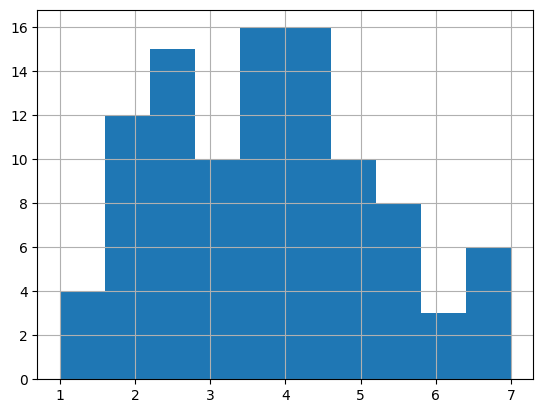

In [41]:
# biểu đồ histogram
import matplotlib.pyplot as plt

df['M1'].hist()
plt.show()

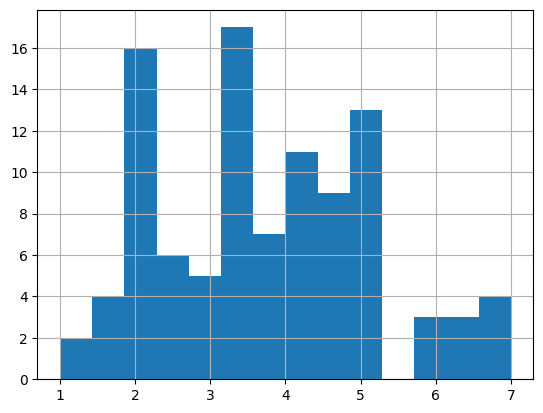

In [42]:
# tự quy định bins
df['M1'].hist(bins=14)
plt.show()

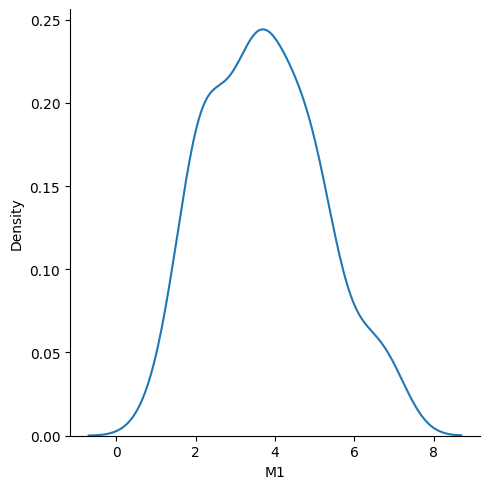

In [43]:
# nâng cao hơn histogram, khám phá dạng phân phối xác xuất
# làm mịn với phân phối xác suất
sns.displot(df, x='M1', kind='kde')
plt.show()

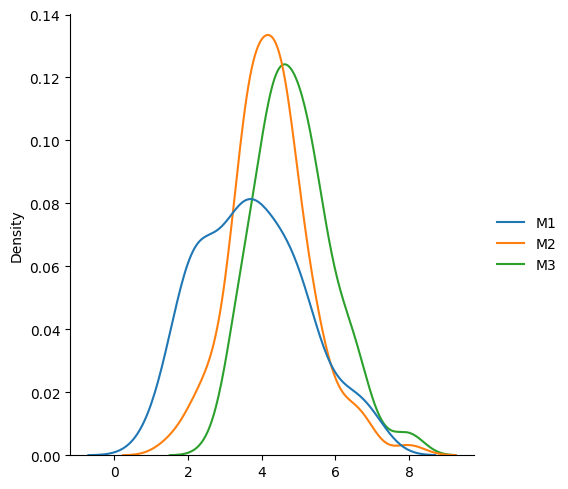

In [44]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

# cho biết dạng pp chuẩn của cái nào gần với pp chuẩn nhất
# xanh nước biển giống nhất

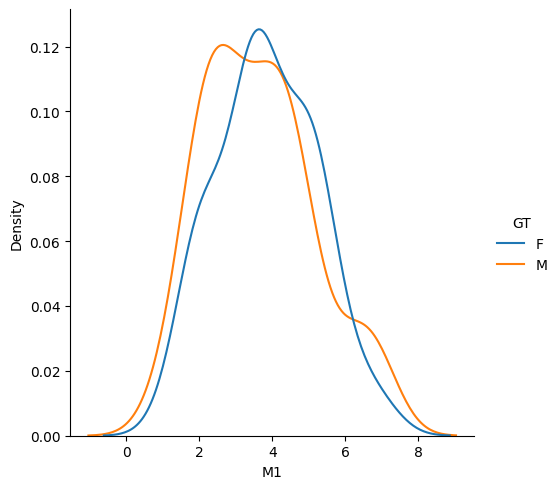

In [45]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()
# màu xanh gần với ppc chuẩn màu cam

In [46]:
# Skewness = độ xiên, độ lớn (trị tuyệt đối) cho biết mức độ dữ liệu
# lệch nhiều hay ít so với đường cong phân phối chuẩn.
# Cho biết xác xuất được phân bổ lệch về phía nào nhiều
# Trị tuyệt đối giá trị càng lớn thì
# dữ liệu phân phối nghiêng càng nhiều (lệch)
# Diễn giải cho skewness
# Skewness ) 0 tức là mean > median : ta gọi là Positive Skewness
# hay lệch phải, tức là giá trị ngoại biên outliers nhận giá trị lớn
# sẽ đẩy giá trị trung bình về cuối
# Skewness < 0 tức là mean < median: ta gọi là Negative Skweness
# hay lệch trái, tức là giá trị outlier nhận giá trị nhỏ sẽ đẩy
# giá trị trung bình về phía đầu
# Skewness = 0 thì mean = median = mode: Phân phối không lệch
# còn được gọi là phân phối đối xứng

df['M1'].skew()

0.33322084231625376

In [47]:
df[['M1','M2','M3']].skew()

# m1 gần giống với ppc nhất vì skewness thấp nhất

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [48]:
# Kurtosis (Pearson Kurtosis): Độ nhọn, trị tuyệt đối cho biết mức độ nhọn của phân phối
# Giá trị của kutorsis:
# Càng gần 3 thì fit
# Dưới 3 thì fat
# Trên 3 thì thin
# Thông thường để đánh giá hình dáng độ nhọn ta dùng đại lượng
# excess kutorsis (còn gọi là Fisher Kurtosis) = Kurtosis - 3I
# + Nếu excess > 0 -> thin
# + Nếu excess = 0 -> fit
# + Nếu excess < 0 -> fat
# + Trị tuyệt đối excess kutoris càng cao thì mức độ thin, fat càng lớn
# LƯU Ý:
# +
# Trong pandas sử dụng Fisher's kutorsis
# + Với pp chuẩn thì excess kurtosis = 0, skewness = 0

df[['M1']].kurtosis()

# m1 là fat

M1   -0.517004
dtype: float64

In [49]:
df[['M1','M2','M3']].kurtosis()
# m2 là thin
# m3 gần fit nhất


M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

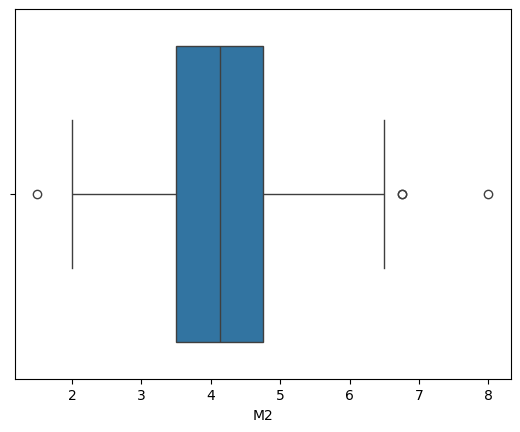

In [51]:
# Đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng
# Biểu đồ nay cung cấp các thông tin quan trọng như
# 1. Q1: Tứ phân vị 25%
# 2. Q2: Tứ phân vị 50% (median)
# 3. Q3: Tứ phân vị 75%
# 4. Độ lớn IQR = |Q3-Q1|
# 5. Lower bound = Q1 - 1.5 * IQR
# 6. Upper bound = Q3 + 1.5 * IQR
# 7. Các ngoại biên, bất thường (outlier) cần xử lý trong dữ liệu
# Outlier: Là điểm dữ liệu khác biệt quá nhiều sự với đa số
#Hướng dẫn
# + Tính khoảng nghi ngờ chứa outliers
# + Tính khoảng chắc chắn chứa outliers

sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [ ]:
# Với điểm M2
# Hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

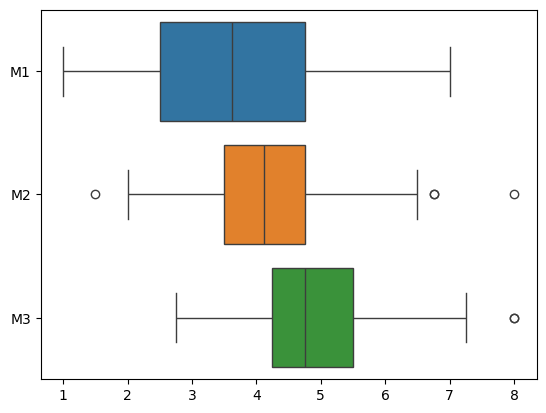

In [52]:

sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

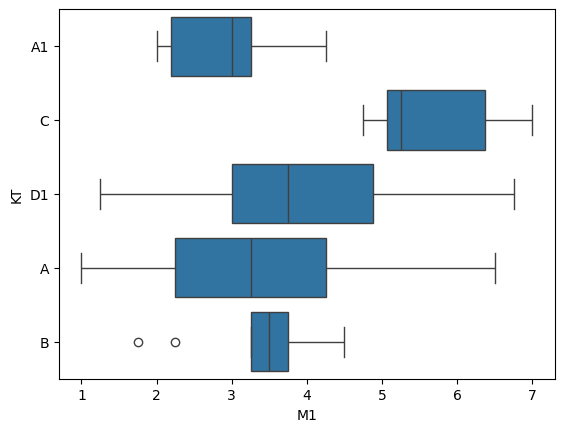

In [53]:
# theo khối thi trên m1
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

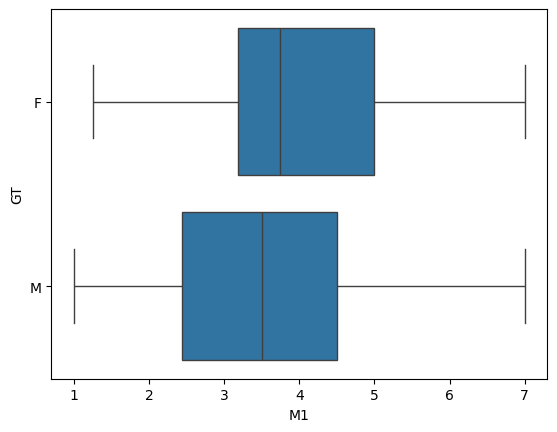

In [54]:
# theo giới tính trên m1
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()

# không có nhóm nào có bất thường
# giới tính có đóng góp vào dự báo điểm m1 không ?
# có đóng góp vì khoảng giá trị của nam và nữ khác nhau

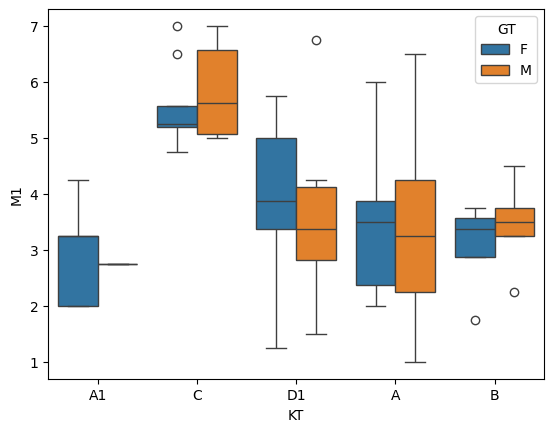

In [55]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

# khối c trên nữ có bt
# khối d1 trên nam có bt
# khối b trên cả 2 đều có bt

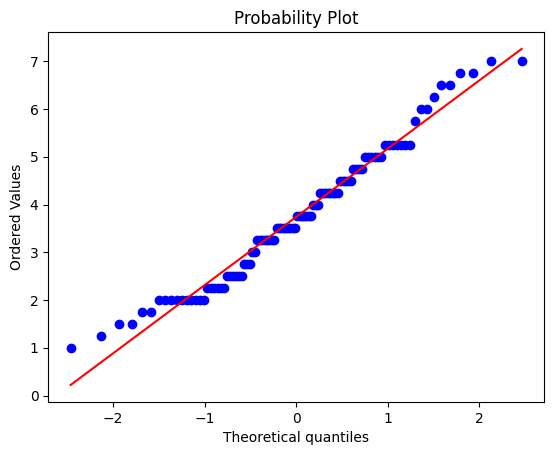

In [57]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

In [58]:
# Phân tích sự tương quan (tác động, ảnh hưởng) qua lại giữa 2 biến định lượng
# Phương pháp 1: Hiệp phương sai: co-variance
# Giá trị co-variance > 0 thì 2 biến có tương quan thuận (đồng biến)
# Giá trị co-variance < 0 thì 2 biến có tương quan nghịch (nghịch biến)
# Giá trị co-variance = 0 thì 2 biến không tương quan
# Độ lớn (trị tuyệt đối của giá trị) càng lớn thì mức độ quan hệ (tương quan) càng
# chặt chẽ
# Ma trận hiệp phương sai: co-variance matrix

df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [59]:
# so sánh tự tương quan giữa m1 với m3 và m2 với m3
df[["M1", "M2", "M3"]].cov()

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


In [60]:
# Với phương pháp so sánh tương quan bằng co-variance
# thì ta không đo lường được
# cường độ tương quan giữa 2 biến định lượng.
# Pearson Correlation: Tương quan tuyến tính
# r nằm trong khoảng [-1,1]
# r = 0: không tương quan
# r < 0: Tương quan nghịch
# r > 0; Tương quan thuận
# |r| càng gần 1 thì tương quan càng cao
# |r| < 0.5: thì tương quan thấp
# [0.5,0.65]: khá
# [9.65,0.75]: tốt
# [9.75,8.9]: rất tốt
# >0.9: hoàn hảo
# Ma trận tương quan: correlation matrix
# LƯU Ý: được sử dụng khảo sát tương quan tuyến tính nhằm
# phân tích mối quan hệ tuyến tính giữa 2 biến định lượng

df[['M1', "M2"]].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


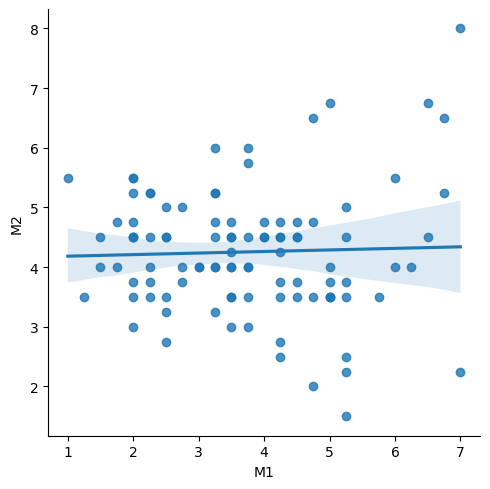

In [61]:
'''
biểu đồ khám phá sự tương quan giữa m1 và m2
càng gần đường xanh thì tương quan càng tốt, càng xa thì càng yếu
'''
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

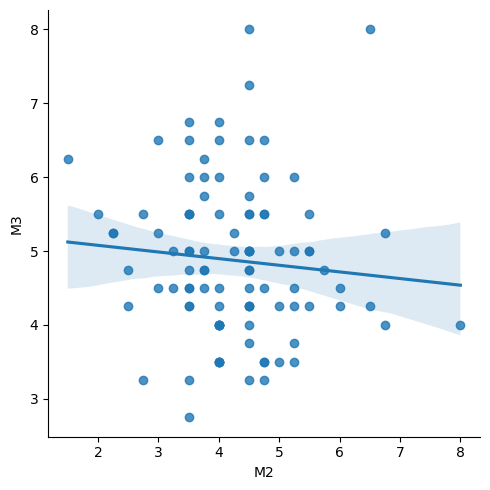

In [62]:
# vẽ biểu đồ sự tương quan giữa m2 và m2
sns.lmplot(data=df, x='M2', y='M3', fit_reg=True)
plt.show()

In [63]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


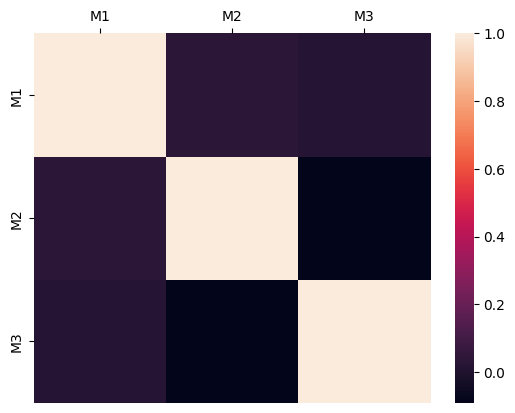

In [64]:
# sử dụng biểu đồ heatmap để biểu thị sự tương quan.
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

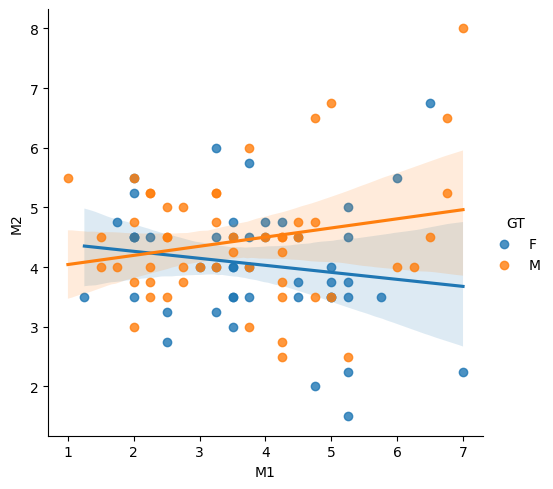

In [65]:
# trực quan tương quan tuyến tính theo nhóm giới tính giữa 2 biến định lượng

sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

# m1 với m2 tương quan với nhau trên nhóm nam tốt hơn

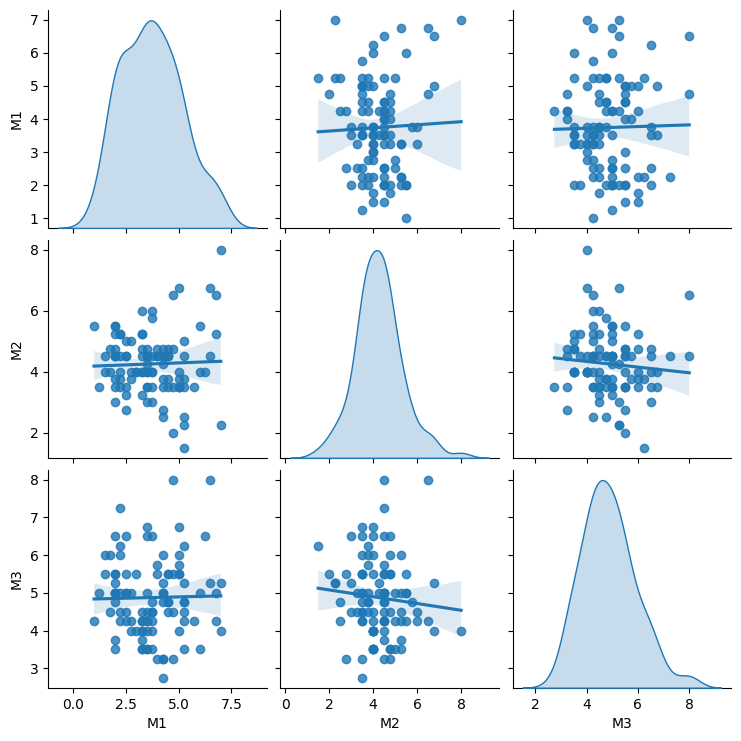

In [66]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()